In [1]:
using DataFrames   #to use pandas dataframes
using CSV       # for working with csv files
using Plots 
using Statistics  
using StatsPlots#package comprising a set of new statistical plot series for a certain data type

In [2]:
using Pkg
Pkg.add("Pandas")  #adding pandas
using Pandas

   Updating registry at `C:\Users\dhruv\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\dhruv\.julia\environments\v1.5\Manifest.toml`


In [3]:
df=read_csv("data.csv") #reading the data and storing in df
Pandas.head(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df=drop(df,["Unnamed: 32"],axis=1); #dropping useless Nan values

In [5]:
df=get_dummies(df,["diagnosis"],dtype="int"); #one hot encoding 

In [6]:
df=drop(df,["diagnosis_B"],axis=1)  ;  #we only need one of the 2

In [7]:
corr(df)   

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


In [8]:
print(corr(df)["diagnosis_M"])

id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

In [9]:
#PLOTTING DATA

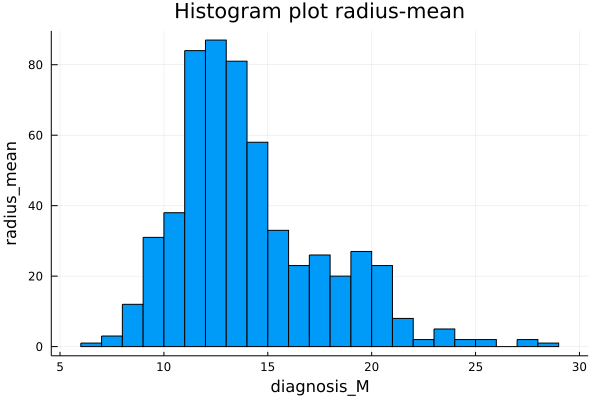

In [10]:
train_plot = histogram(Array(df["diagnosis_M"]), Array(df["radius_mean"]),title = "Histogram plot radius-mean", xlabel = "diagnosis_M", ylabel ="radius_mean", legends = false)
#as radius mean had high correlation with respect to diagnosis-m we plot it

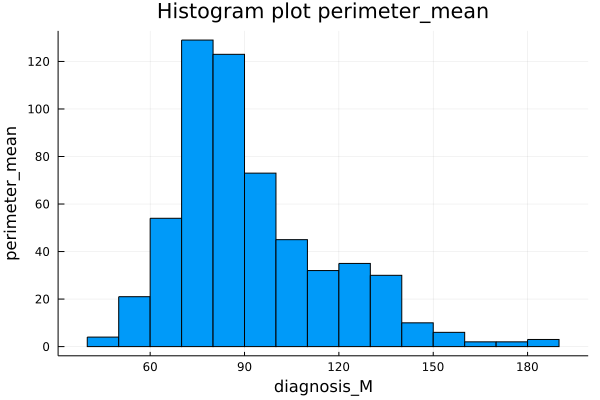

In [11]:
train_plot2 = histogram(Array(df["diagnosis_M"]), Array(df["perimeter_mean"]),title = "Histogram plot perimeter_mean", xlabel = "diagnosis_M", ylabel ="perimeter_mean", legends = false)
#as perimeter_mean had high correlation with respect to diagnosis-m we plot it

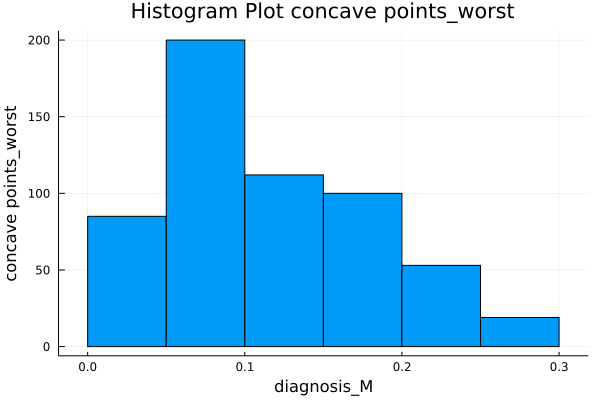

In [12]:
train_plot2 = histogram(Array(df["diagnosis_M"]), Array(df["concave points_worst"]),title = "Histogram Plot concave points_worst", xlabel = "diagnosis_M", ylabel ="concave points_worst", legends = false)
#as concave points_worst had high correlation with respect to diagnosis-m we plot it

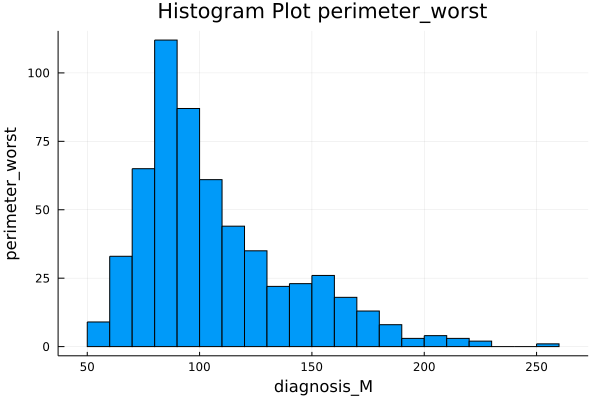

In [13]:
train_plot2 = histogram(Array(df["diagnosis_M"]), Array(df["perimeter_worst"]),title = "Histogram Plot perimeter_worst", xlabel = "diagnosis_M", ylabel ="perimeter_worst", legends = false)
#as perimeter_worsthad high correlation with respect to diagnosis-m we plot it

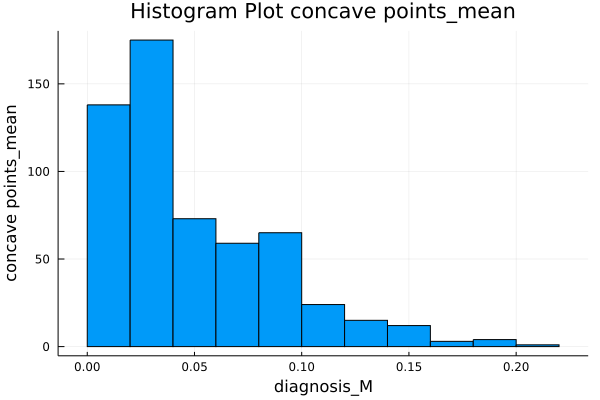

In [14]:
train_plot2 = histogram(Array(df["diagnosis_M"]), Array(df["concave points_mean"]),title = "Histogram Plot concave points_mean", xlabel = "diagnosis_M", ylabel ="concave points_mean", legends = false)
#as concave points_mean had high correlation with respect to diagnosis-m we plot it

In [15]:
train_plot2 = scatter([Array(df["area_mean"]),Array(df["smoothness_mean"]), Array(df["diagnosis_M"]),title = "texture_mean vs smoothness_mean ", xlabel = "texture_mean", ylabel ="smoothness_mean",label = ["Line 1" "Line 2" ] )

LoadError: [91msyntax: missing separator in array expression[39m

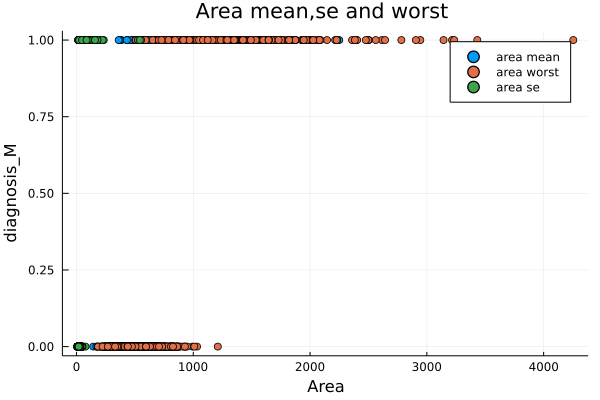

In [16]:
train_plot2 = scatter([Array(df["area_mean"]),Array(df["area_worst"]),Array(df["area_se"])], Array(df["diagnosis_M"]),title = "Area mean,se and worst ", xlabel = "Area", ylabel ="diagnosis_M",label = ["area mean" "area worst" "area se"] )

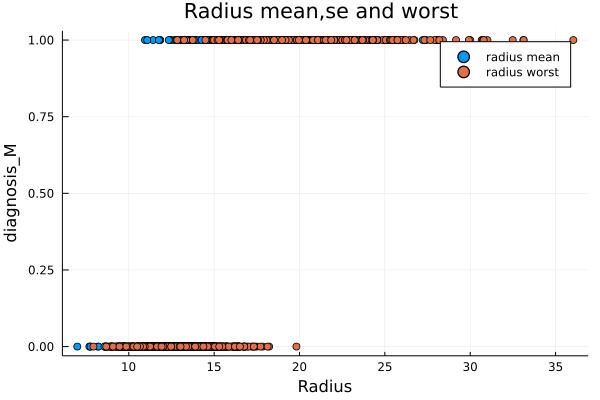

In [17]:
train_plot2 = scatter([Array(df["radius_mean"]),Array(df["radius_worst"])], Array(df["diagnosis_M"]),title = "Radius mean,se and worst ", xlabel = "Radius", ylabel ="diagnosis_M",label = ["radius mean" "radius worst" ] )

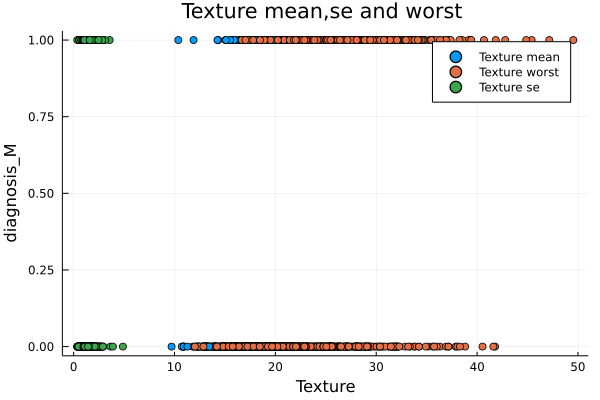

In [18]:
train_plot2 = scatter([Array(df["texture_mean"]),Array(df["texture_worst"]),Array(df["texture_se"])], Array(df["diagnosis_M"]),title = "Texture mean,se and worst ", xlabel = "Texture", ylabel ="diagnosis_M",label = ["Texture mean" "Texture worst" "Texture se"] )

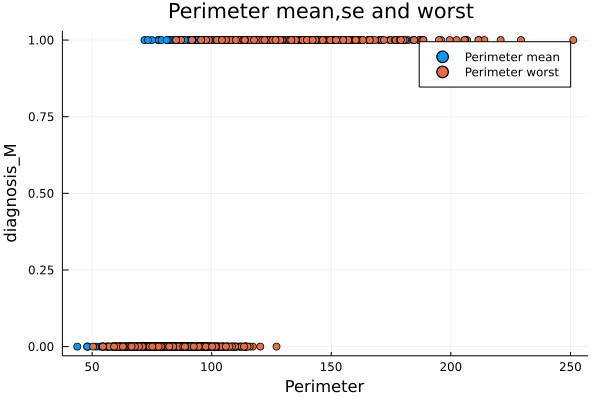

In [19]:
train_plot2 = scatter([Array(df["perimeter_mean"]),Array(df["perimeter_worst"])], Array(df["diagnosis_M"]),title = "Perimeter mean,se and worst ", xlabel = "Perimeter", ylabel ="diagnosis_M",label = ["Perimeter mean" "Perimeter worst"] )

In [20]:
y=Array(df["diagnosis_M"]);   # storing diagnosis_M as our y

569-element Array{Int32,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 0
 0
 0
 1
 1
 1
 1
 1
 1
 0

In [21]:
x=drop(df,["diagnosis_M","id"],axis=1);  #x doesnt need to have diagnosis_M as well as id as its useless

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750


In [22]:
using ScikitLearn
@sk_import model_selection: train_test_split 
trainx ,testx ,trainy ,testy=train_test_split(x,y,test_size=0.20)  #splitting our data into training part as well as testing part

┌ Warning: Module model_selection has been ported to Julia - try `import ScikitLearn: CrossValidation` instead
└ @ ScikitLearn.Skcore C:\Users\dhruv\.julia\packages\ScikitLearn\Kn82b\src\Skcore.jl:169


4-element Array{Any,1}:
 PyObject      radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
541       14.470         24.99  ...          0.3187                  0.10230
256       19.550         28.77  ...          0.2818                  0.10050
164       23.270         22.04  ...          0.3589                  0.09187
375       16.170         16.07  ...          0.3153                  0.08960
163       12.340         22.22  ...          0.2268                  0.09082
..           ...           ...  ...             ...                      ...
198       19.180         22.49  ...          0.3193                  0.09221
420       11.570         19.04  ...          0.3035                  0.08284
525        8.571         13.10  ...          0.2983                  0.10490
80        11.450         20.97  ...          0.2762                  0.08851
422       11.610         16.02  ...          0.2787                  0.07427

[455 rows x 30 columns]
 PyObject      ra

In [23]:
trainx

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
541,14.470,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,0.2542,1.0790,2.615,23.110,0.007138,0.04653,0.03829,0.011620,0.02068,0.006111,16.220,31.73,113.50,808.9,0.1340,0.4202,0.4040,0.12050,0.3187,0.10230
256,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,0.8426,1.1990,7.158,106.400,0.006356,0.04765,0.03863,0.015190,0.01936,0.005252,25.050,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.19410,0.2818,0.10050
164,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.850,0.004910,0.02544,0.02822,0.016230,0.01956,0.003740,28.010,28.22,184.20,2403.0,0.1228,0.3583,0.3948,0.23460,0.3589,0.09187
375,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,0.1745,0.4890,1.349,14.910,0.004510,0.01812,0.01951,0.011960,0.01934,0.003696,16.970,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,0.2949,1.6560,1.955,21.550,0.011340,0.03175,0.03125,0.011350,0.01879,0.005348,13.580,28.68,87.36,553.0,0.1452,0.2338,0.1688,0.08194,0.2268,0.09082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,19.180,22.49,127.50,1148.0,0.08523,0.14280,0.11140,0.06772,0.1767,0.05529,0.4357,1.0730,3.833,54.220,0.005524,0.03698,0.02706,0.012210,0.01415,0.003397,23.360,32.06,166.40,1688.0,0.1322,0.5601,0.3865,0.17080,0.3193,0.09221
420,11.570,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,0.2864,1.4400,2.206,20.300,0.007278,0.02047,0.04447,0.008799,0.01868,0.003339,13.070,26.98,86.43,520.5,0.1249,0.1937,0.2560,0.06664,0.3035,0.08284
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.01510,0.1678,0.07126,0.1267,0.6793,1.069,7.254,0.007897,0.01762,0.01801,0.007320,0.01592,0.003925,9.473,18.45,63.30,275.6,0.1641,0.2235,0.1754,0.08512,0.2983,0.10490
80,11.450,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,0.1842,0.07005,0.3251,2.1740,2.077,24.620,0.010370,0.01706,0.02586,0.007506,0.01816,0.003976,13.110,32.16,84.53,525.1,0.1557,0.1676,0.1755,0.06127,0.2762,0.08851


In [24]:
testx

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
120,11.410,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,0.1408,0.4607,1.103,10.50,0.006040,0.01529,0.01514,0.006460,0.01344,0.002206,12.820,15.97,83.74,510.5,0.1548,0.23900,0.21020,0.08958,0.3016,0.08523
440,10.970,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,0.2574,1.3760,2.806,18.15,0.008565,0.04638,0.06430,0.017680,0.01516,0.004976,12.360,26.87,90.14,476.4,0.1391,0.40820,0.47790,0.15550,0.2540,0.09532
521,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,0.1991,0.06739,0.9915,0.9004,7.050,139.90,0.004989,0.03212,0.03571,0.015970,0.01879,0.004760,29.920,26.93,205.70,2642.0,0.1342,0.41880,0.46580,0.24750,0.3157,0.09671
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,0.3013,1.8790,2.121,17.86,0.010940,0.01834,0.03996,0.012820,0.03759,0.004623,9.845,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393
126,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,0.1761,0.06130,0.2310,1.0050,1.752,19.83,0.004088,0.01174,0.01796,0.006880,0.01323,0.001465,16.890,35.64,113.20,848.7,0.1471,0.28840,0.37960,0.13290,0.3470,0.07900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.05948,0.3163,1.3040,2.115,20.67,0.009579,0.01104,0.00000,0.000000,0.03004,0.002228,11.660,24.77,74.08,412.3,0.1001,0.07348,0.00000,0.00000,0.2458,0.06592
335,17.060,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,0.8161,2.1290,6.076,87.17,0.006455,0.01797,0.04502,0.017440,0.01829,0.003733,20.990,33.15,143.20,1362.0,0.1449,0.20530,0.39200,0.18270,0.2623,0.07599
262,17.290,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,0.2108,0.05464,0.8348,1.6330,6.146,90.94,0.006717,0.05981,0.04638,0.021490,0.02747,0.005838,20.390,27.24,137.90,1295.0,0.1134,0.28670,0.22980,0.15280,0.3067,0.07484
40,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,0.2385,0.8265,1.572,20.53,0.003280,0.01102,0.01390,0.006881,0.01380,0.001286,15.930,30.25,102.50,787.9,0.1094,0.20430,0.20850,0.11120,0.2994,0.07146


In [25]:
trainy

455-element Array{Int32,1}:
 0
 1
 1
 0
 0
 0
 0
 0
 1
 0
 0
 1
 0
 ⋮
 0
 1
 1
 1
 1
 0
 0
 1
 0
 0
 0
 0

In [26]:
testy

114-element Array{Int32,1}:
 0
 0
 1
 0
 1
 0
 0
 1
 1
 0
 0
 0
 1
 ⋮
 0
 0
 1
 1
 1
 0
 0
 0
 1
 1
 1
 0

In [27]:
@sk_import ensemble:RandomForestClassifier
model=RandomForestClassifier().fit(trainx,trainy)  #using random forest technique to train our model

PyObject RandomForestClassifier()

In [28]:
pred=ScikitLearn.predict(model,testx)   #testing our model on test data

114-element Array{Int32,1}:
 0
 0
 1
 0
 0
 0
 0
 1
 1
 0
 0
 0
 1
 ⋮
 1
 1
 1
 1
 1
 0
 0
 0
 1
 1
 0
 0

In [29]:
@sk_import metrics: r2_score   
print("ACCURACY IS : ")
r2_score(testy,pred)  

ACCURACY IS : 

0.736111111111111

In [30]:
@sk_import metrics: classification_report   
print("CLASSIFICATION REPORT : ")
print(classification_report(testy,pred))   

CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


In [31]:
using MLBase
print("CONFUSION MATRIX :")
confusionM=MLBase.roc(testy,pred)

CONFUSION MATRIX :

ROCNums{Int64}
  p = 42
  n = 72
  tp = 38
  tn = 69
  fp = 3
  fn = 4
